In [353]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import math
import seaborn as sns
import os
%matplotlib inline

In [354]:
df = pd.read_csv(r'C:\WORK_IAAC\submissions\Data Science II\final_submission\data_src\data_train.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id0458976,2,2016-06-29 18:21:02,2016-06-29 18:39:55,1,-73.862762,40.768822,-73.891701,40.746689,N,1133
1,id0434613,2,2016-04-25 13:03:26,2016-04-25 13:18:13,1,-73.958038,40.783237,-73.975510,40.760853,N,887
2,id3809234,2,2016-05-07 12:36:09,2016-05-07 12:47:35,1,-73.969460,40.785519,-73.989243,40.771748,N,686
3,id1203705,1,2016-05-14 18:44:17,2016-05-14 18:57:55,1,-73.981743,40.736549,-73.998352,40.726440,N,818
4,id1896645,2,2016-04-10 22:51:25,2016-04-10 23:07:16,1,-73.977913,40.752609,-73.975647,40.733139,N,951


In [344]:
dx = pd.read_csv(r'C:\WORK_IAAC\submissions\Data Science II\final_submission\data_src\data_test.csv')
dx.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2793718,2,2016-06-08 07:36:19,2016-06-08 07:53:39,1,-73.985611,40.735943,-73.980331,40.760468,N
1,id3485529,2,2016-04-03 12:58:11,2016-04-03 13:11:58,1,-73.978394,40.764351,-73.991623,40.749859,N
2,id1816614,2,2016-06-05 02:49:13,2016-06-05 02:59:27,5,-73.989059,40.744389,-73.973381,40.748692,N
3,id1050851,2,2016-05-05 17:18:27,2016-05-05 17:32:54,2,-73.990326,40.731136,-73.991264,40.748917,N
4,id0140657,1,2016-05-12 17:43:38,2016-05-12 19:06:25,4,-73.789497,40.646675,-73.987137,40.759232,N


In [345]:
df.info(), dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166915 entries, 0 to 1166914
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1166915 non-null  object 
 1   vendor_id           1166915 non-null  int64  
 2   pickup_datetime     1166915 non-null  object 
 3   dropoff_datetime    1166915 non-null  object 
 4   passenger_count     1166915 non-null  int64  
 5   pickup_longitude    1166915 non-null  float64
 6   pickup_latitude     1166915 non-null  float64
 7   dropoff_longitude   1166915 non-null  float64
 8   dropoff_latitude    1166915 non-null  float64
 9   store_and_fwd_flag  1166915 non-null  object 
 10  trip_duration       1166915 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 97.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291729 entries, 0 to 291728
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  


(None, None)

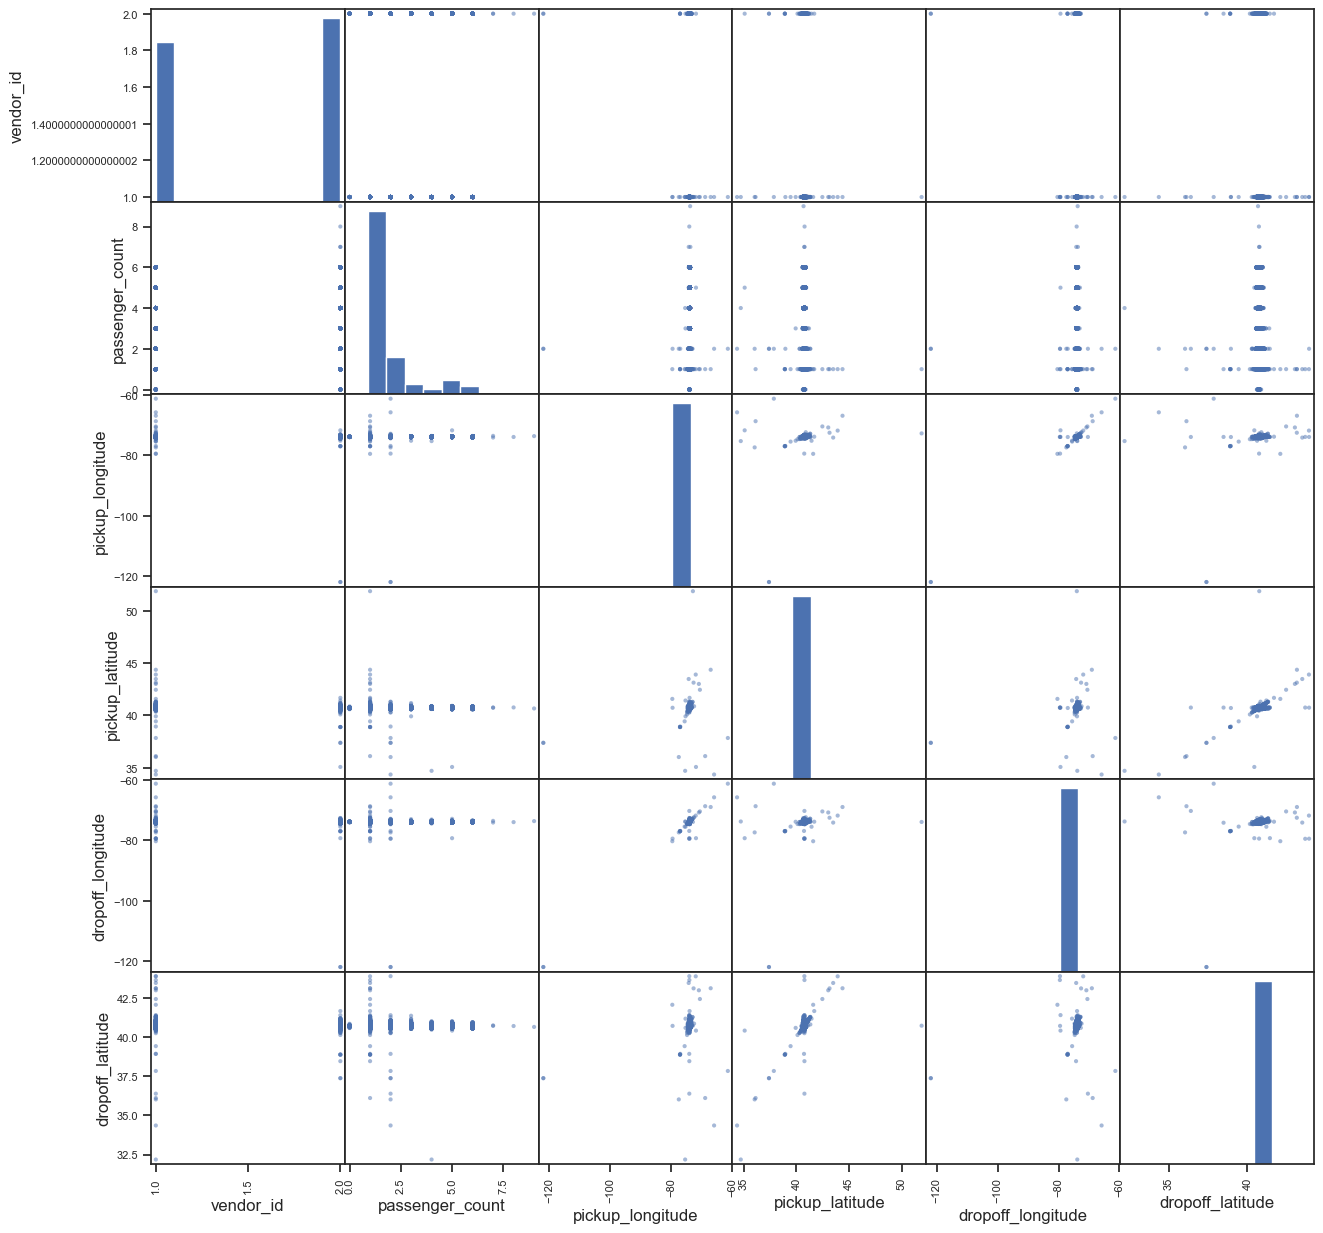

In [355]:
#basic Pearson analysis of data correlation
#split data into two datasets: numeric and categorical

df_num = df[['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
df_cat = df[["id", "store_and_fwd_flag"]]

pd.plotting.scatter_matrix(df_num, figsize=(15, 15))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-pac

Time taken by above cell is 45.92119359970093.


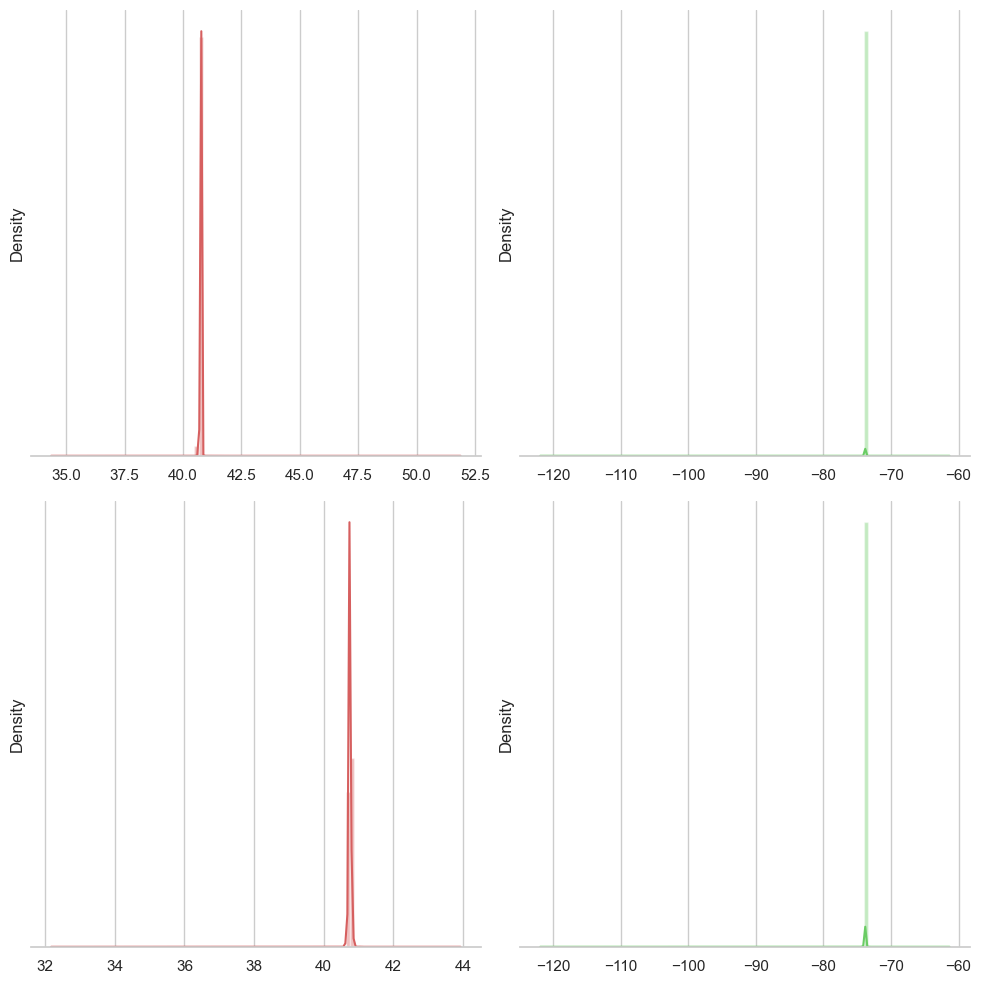

In [337]:
#analyzing density of geo-coordinates with sns distplot
import time

start = time.time()
sns.set(style="whitegrid", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="r",bins = 100, ax=axes[0,0])
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins =100, ax=axes[0,1])
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="r",bins =100, ax=axes[1, 0])
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="g",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-pac

Time taken by above cell is 36.71675205230713.


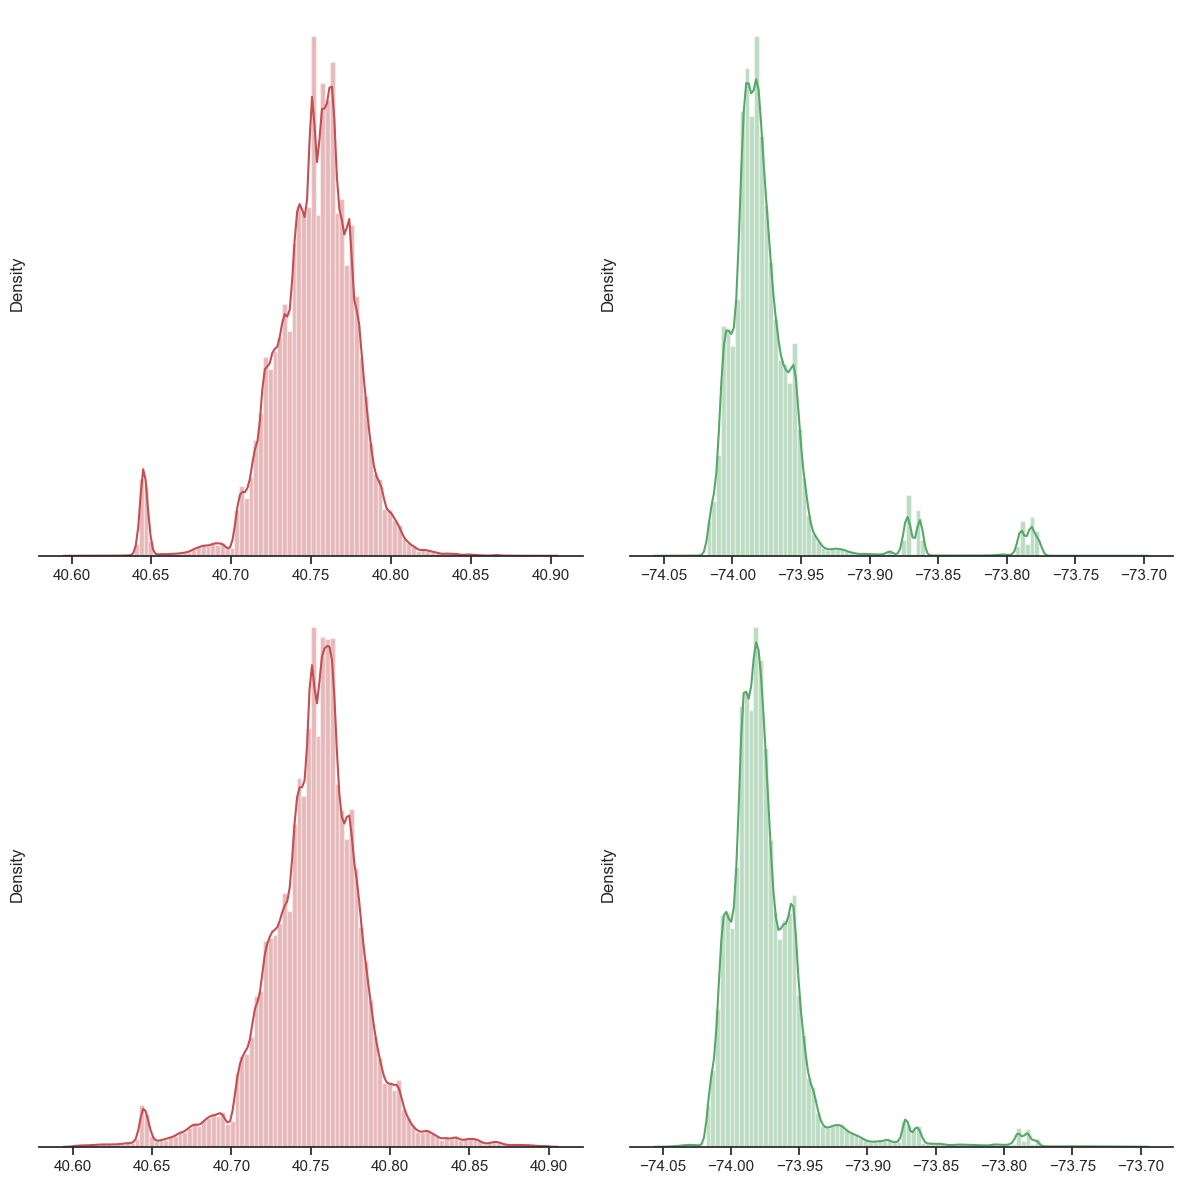

In [338]:
#filter data of geo-coordinates with outlayers, remake analysis of geo-coordinates
start = time.time()
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
train_data_new = df.copy()
sns.set(style="ticks", palette="deep", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(12, 12), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(train_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="r",bins = 100, ax=axes[0,0])
sns.distplot(train_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins =100, ax=axes[0,1])
sns.distplot(train_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="r",bins =100, ax=axes[1, 0])
sns.distplot(train_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="g",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))
plt.show()

In [346]:
start = time.time()
train_data = df.copy()
temp = train_data.copy()
train_data['pickup_datetime'] = pd.to_datetime(train_data.pickup_datetime)
train_data.loc[:, 'pick_date'] = train_data['pickup_datetime'].dt.date
train_data.head()

ts_v1 = pd.DataFrame(train_data.loc[train_data['vendor_id']==1].groupby('pick_date')['trip_duration'].mean())
ts_v1.reset_index(inplace = True)
ts_v2 = pd.DataFrame(train_data.loc[train_data.vendor_id==2].groupby('pick_date')['trip_duration'].mean())
ts_v2.reset_index(inplace = True)

from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook, show
#from bokeh.sampledata.stocks import AAPL, IBM, MSFT, GOOG
output_notebook()
p = figure(plot_width=800, plot_height=400, x_axis_type="datetime")
p.title.text = 'Click on legend entries to hide the corresponding lines'

for data, name, color in zip([ts_v1, ts_v2], ["vendor 1", "vendor 2"], Spectral4):
    df = data
    p.line(df['pick_date'], df['trip_duration'], line_width=3, color=color, alpha=0.7, legend=name)

p.legend.location = "top_right"
p.legend.click_policy="hide"
show(p)
end = time.time()
train_data = temp
print("Time Taken by above cell is {}.".format(end - start))

Loading BokehJS ...

Time Taken by above cell is 3.321378469467163.


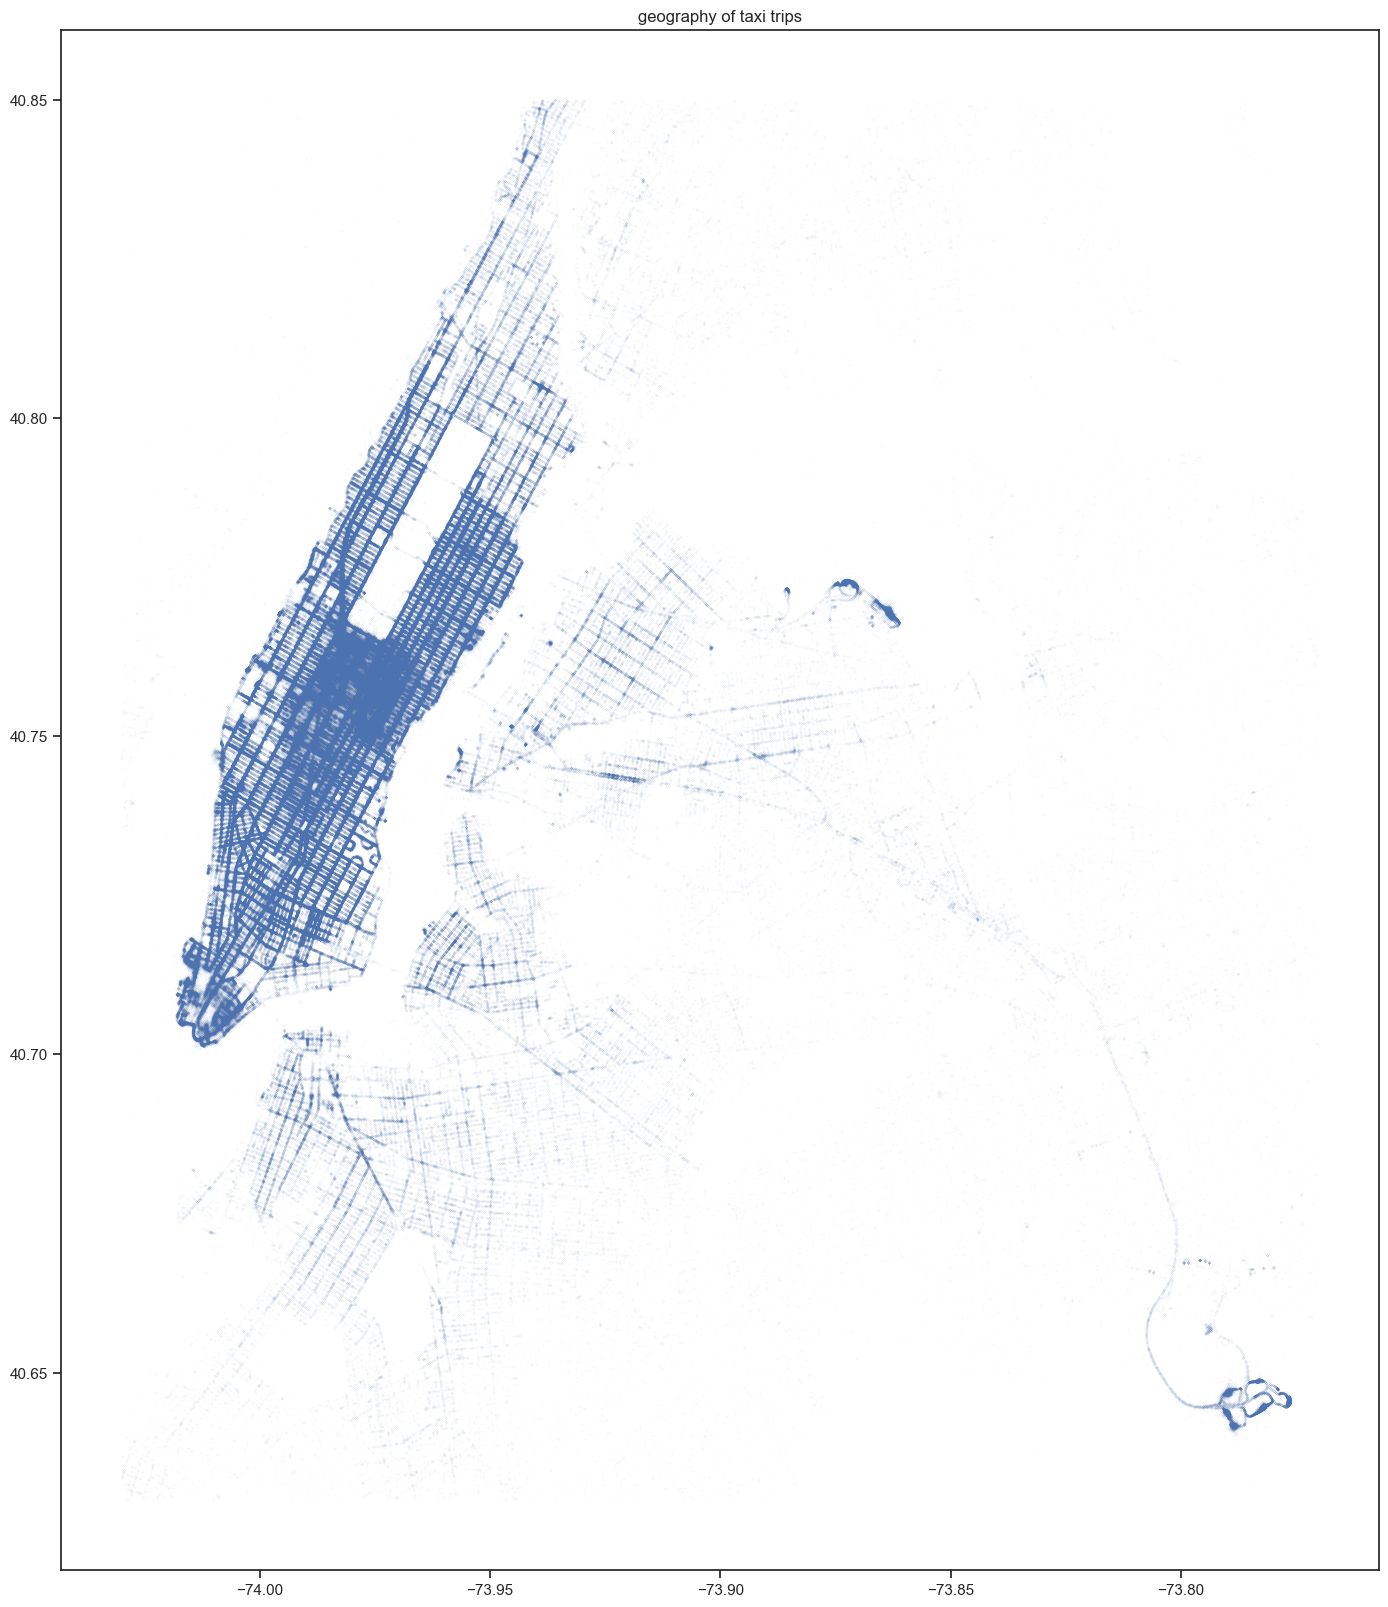

Time taken by above cell is 4.8559160232543945.


In [367]:
#vizualize data of pickup an dropoff geo-coordinates in map-like space
start = time.time()
xlim = [-74.05, -73.75]
ylim = [40.60, 40.90]
dfg = df[(df.pickup_longitude> xlim[0]) & (df.pickup_longitude < xlim[1])]
dfg = df[(df.dropoff_longitude> xlim[0]) & (df.dropoff_longitude < xlim[1])]
dfg = df[(df.pickup_latitude> ylim[0]) & (df.pickup_latitude < ylim[1])]
dfg = df[(df.dropoff_latitude> ylim[0]) & (df.dropoff_latitude < ylim[1])]

longitude = list(df.pickup_longitude) + list(df.dropoff_longitude)
latitude = list(df.pickup_latitude) + list(df.dropoff_latitude)
plt.figure(figsize = (17,20))
plt.plot(longitude,latitude,'.', alpha = 0.8, markersize = 0.05)
plt.title('geography of taxi trips')
plt.show()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))

In [360]:
loc_df = pd.DataFrame()
loc_df['longitude'] = longitude
loc_df['latitude'] = latitude

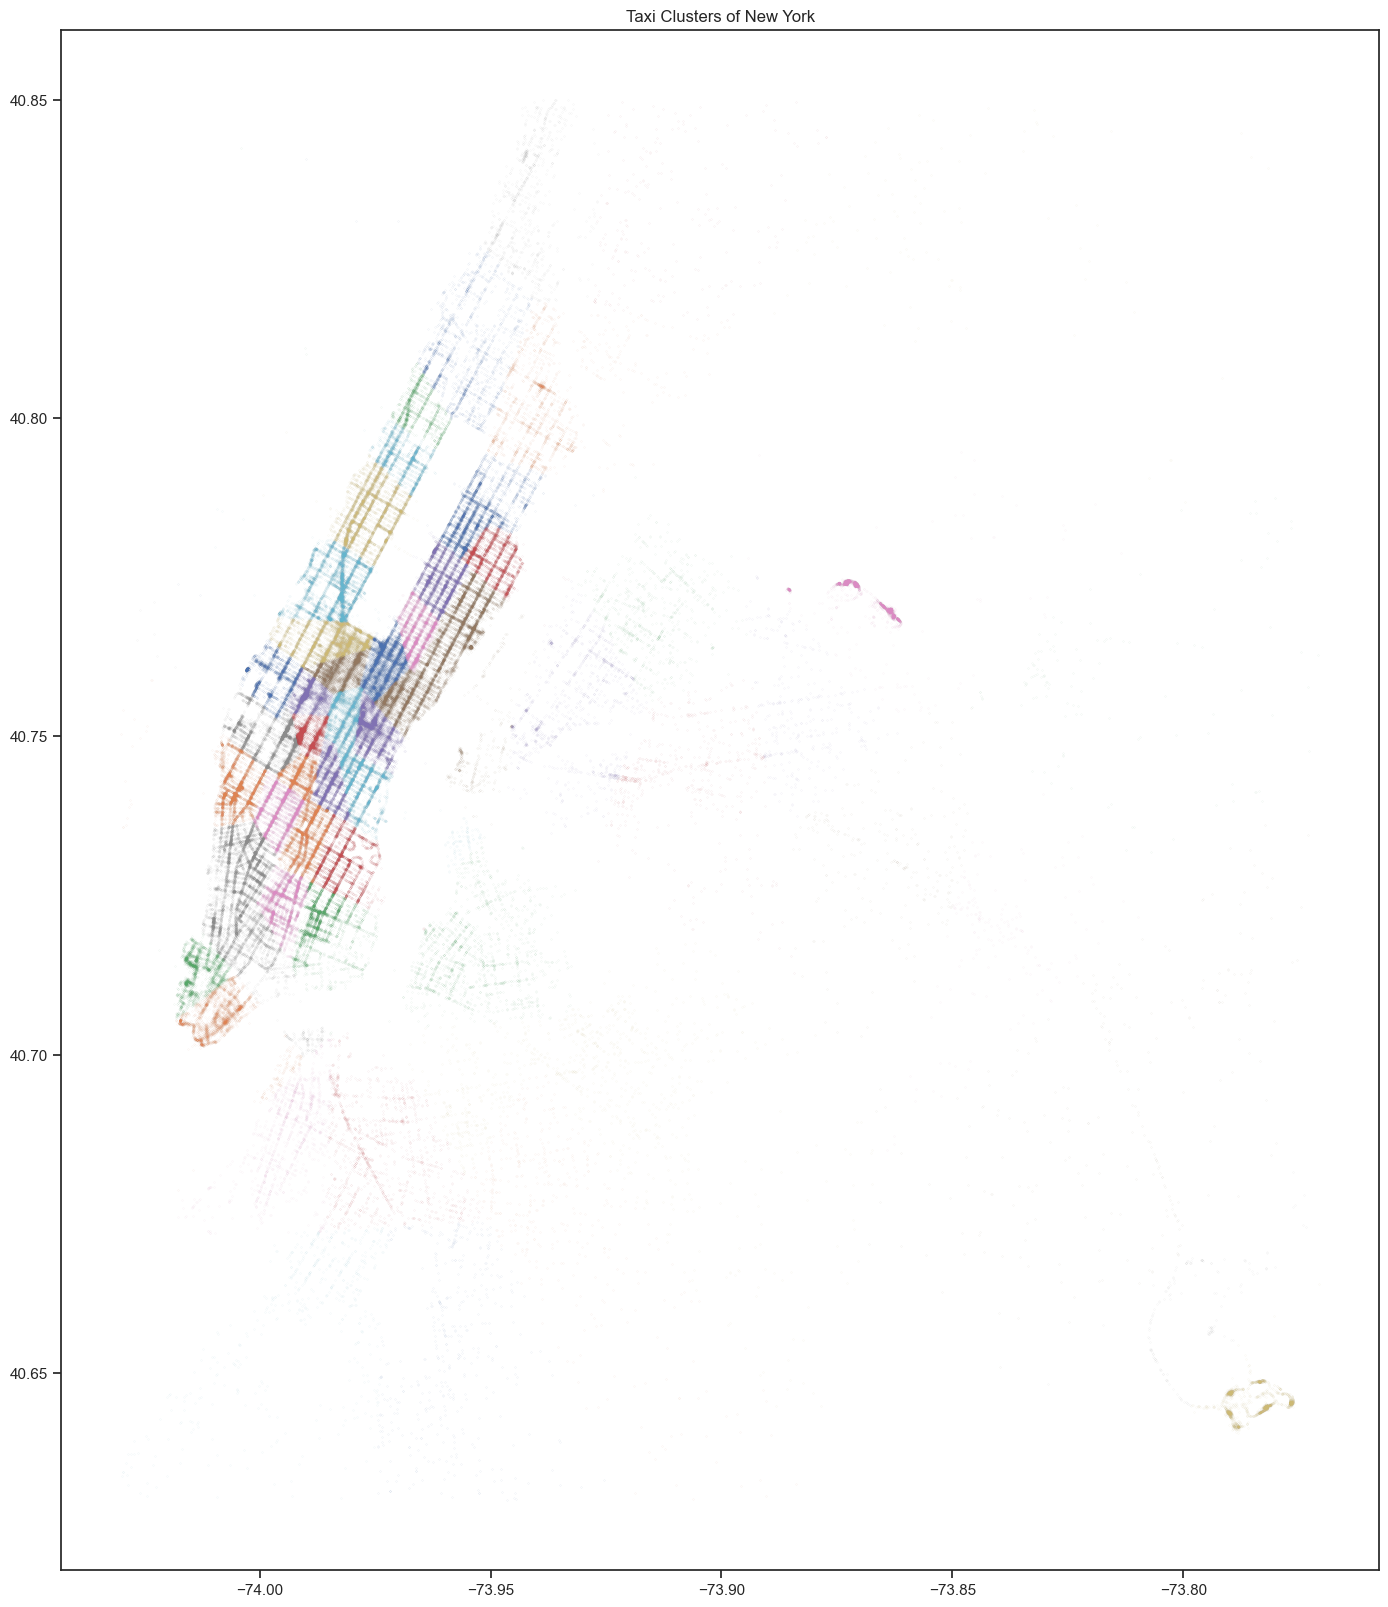

Time taken by above cell is 19.346493244171143.


In [369]:
#making clusters from geo-coordinates of pickup and dropoff
#59 clusters due to the number of community boards in NYC
start = time.time()
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
kmeans = KMeans(n_clusters=59, random_state=104, n_init = 10).fit(loc_df)
loc_df['label'] = kmeans.labels_

loc_df = loc_df.sample(200000)
plt.figure(figsize = (17,20))
for label in loc_df.label.unique():
    plt.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 0.7, markersize = 0.1)

plt.title('Taxi Clusters of New York')
plt.show()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))

In [ ]:
#cluters take quite large time to calculate, let's try another options of regressions

In [292]:
#trip frequency per passengers' amount
fig = px.bar(df.groupby('passenger_count')
             .agg({'id': 'count'})
             .reset_index()
             .rename(columns={'passenger_count': 'passengers', 'id': 'trip_number'}),
             x='passengers', y='trip_number', title='number of trips by passengers amount')

fig.show()

In [293]:
#removing outlayers of passengers - 0 and more 6
df_1 = df.query('(passenger_count !=0) & (passenger_count <7)')
#removing trips longer 3 hours
df_2 = train_1.query('trip_duration < 10800')
#removing trips beyond the specified geo-frame: longitude
df_2.query('(pickup_longitude < -74.03) | (pickup_longitude > -73.75)').count()

id                    664
vendor_id             664
pickup_datetime       664
dropoff_datetime      664
passenger_count       664
pickup_longitude      664
pickup_latitude       664
dropoff_longitude     664
dropoff_latitude      664
store_and_fwd_flag    664
trip_duration         664
dtype: int64

In [294]:
#removing trips beyond the specified geo-frame: latitude
df_2.query('(pickup_latitude > 40.9) | (pickup_latitude < 40.63)').count()

id                    430
vendor_id             430
pickup_datetime       430
dropoff_datetime      430
passenger_count       430
pickup_longitude      430
pickup_latitude       430
dropoff_longitude     430
dropoff_latitude      430
store_and_fwd_flag    430
trip_duration         430
dtype: int64

In [295]:
df_3 = df_2.query('(pickup_longitude > -74.03) | (pickup_longitude < -73.75)')
df_3 = df_3.query('(pickup_latitude < 40.9) | (pickup_latitude > 40.63)')

In [296]:
#clarify the share of filtered trips
df_3_count = df_3.shape[0]
df_count = df.shape[0]
filtered = round(((df_3_count/df_count) * 100), 2)
print('initially were', df_count, 'trips.')
print('filtered are', df_3_count, 'trips that correlates to', str(filtered) + '%')

initially were 1166915 trips.
filtered are 1165205 trips that correlates to 99.85%


In [297]:
#count the difference between pickup and dropoff points of geo-coordinates and add them to the dataframe
longitude_lag = df_3['pickup_longitude'] - df_3['dropoff_longitude']
latitude_lag = df_3['pickup_latitude'] - df_3['dropoff_latitude']
df_3 = df_3.assign(long_lag = np.abs(longitude_lag))
df_3 = df_3.assign(lat_lag = np.abs(latitude_lag))

In [298]:
#calculate a distance of 1 degree in km on specific latitude with by Haversine formula
def degree_length(lat):
    # Convert latitude to radians
    lat = math.radians(lat)
    # Earth's radius in meters
    earth_radius = 6371000
    # Calculate the length of a degree of longitude at the given latitude
    degrees_per_radian = 180 / math.pi
    radians_per_degree = math.pi / 180
    length = math.cos(lat) * earth_radius * math.pi / 180
    return length
# Calculate the length of a degree of longitude at specified latitude of NYC
lat = 40.5
length = round(degree_length(lat),0)
print(length)

84553.0


In [321]:
latitude = 40
length_of_1_minute = (math.cos(math.radians(latitude)) * 111.32) / 60
print(length_of_1_minute)

1.4212677901334103


In [299]:
#reduce rows by distance larger 84.5 km
df_4 = df_3.query('long_lag < 1')
df_4 = df_4.query('lat_lag < 1')

In [300]:
#get month, day, hour, day of week from pickup datetime
df_4['pickup_datetime'] = pd.to_datetime(df_4['pickup_datetime'])
df_4['month'] = df_4['pickup_datetime'].dt.month
df_4['day_of_month'] = df_4['pickup_datetime'].dt.day
df_4['hour'] =  df_4['pickup_datetime'].dt.hour
df_4['day_of_week'] = df_4['pickup_datetime'].dt.dayofweek

In [301]:
df_4.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,long_lag,lat_lag,month,day_of_month,hour,day_of_week
0,id0458976,2,2016-06-29 18:21:02,2016-06-29 18:39:55,1,-73.862762,40.768822,-73.891701,40.746689,N,1133,0.028938,0.022133,6,29,18,2
1,id0434613,2,2016-04-25 13:03:26,2016-04-25 13:18:13,1,-73.958038,40.783237,-73.975510,40.760853,N,887,0.017471,0.022385,4,25,13,0
2,id3809234,2,2016-05-07 12:36:09,2016-05-07 12:47:35,1,-73.969460,40.785519,-73.989243,40.771748,N,686,0.019783,0.013771,5,7,12,5
3,id1203705,1,2016-05-14 18:44:17,2016-05-14 18:57:55,1,-73.981743,40.736549,-73.998352,40.726440,N,818,0.016609,0.010109,5,14,18,5
4,id1896645,2,2016-04-10 22:51:25,2016-04-10 23:07:16,1,-73.977913,40.752609,-73.975647,40.733139,N,951,0.002266,0.019470,4,10,22,6


In [302]:
#load module and split data on train and test
from sklearn.model_selection import train_test_split
#remove not necessary columns and clean the final train dataset
drop_columns = ['id', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag']
df_clean = df_4.drop(drop_columns, axis=1)
X = df_clean.drop('trip_duration', axis=1)
y = df_clean['trip_duration']

In [303]:
#split dataset to train and test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=102)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#fit train data to regression container
baseline_lr = LinearRegression()
baseline_lr.fit(X_train, y_train)

LinearRegression()

In [304]:
#predict trip duration with Linear regression
y_lr_predict = baseline_lr.predict(X_test)
#load test absolute metric error for linear regression
from sklearn.metrics import mean_absolute_error
LR_MAE = mean_absolute_error(y_test, y_lr_predict)
print('Median absolute error in seconds =', LR_MAE)

Median absolute error in seconds = 291.0918991901533


In [305]:
#load RandomForest regression and fit model
RF_model = RandomForestRegressor()
 
RF_model.fit(X_train, y_train)
rf_predict = RF_model.predict(X_test)

In [306]:
#load test absolute metric error for RandomForest regression, get prediction for full dataset 
RF_MAE = mean_absolute_error(y_test, rf_predict)
RF_MAE
rf_predict_full = RF_model.predict(X)
df_clean['trip_RF_predict'] = rf_predict_full

In [307]:
df_clean.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,long_lag,lat_lag,month,day_of_month,hour,day_of_week,trip_RF_predict
0,2,1,-73.862762,40.768822,-73.891701,40.746689,1133,0.028938,0.022133,6,29,18,2,1036.62
1,2,1,-73.958038,40.783237,-73.975510,40.760853,887,0.017471,0.022385,4,25,13,0,1027.65
2,2,1,-73.969460,40.785519,-73.989243,40.771748,686,0.019783,0.013771,5,7,12,5,676.67
3,1,1,-73.981743,40.736549,-73.998352,40.726440,818,0.016609,0.010109,5,14,18,5,823.35
4,2,1,-73.977913,40.752609,-73.975647,40.733139,951,0.002266,0.019470,4,10,22,6,771.64


In [308]:
#prepare testblock for prediction
#calculate distance between points, add to the dataframe
longitude_lag_test = dx['pickup_longitude'] - dx['dropoff_longitude']
latitude_lag_test = dx['pickup_latitude'] - dx['dropoff_latitude']
dx = dx.assign(long_lag = np.abs(longitude_lag_test))
dx = dx.assign(lat_lag = np.abs(latitude_lag_test))
drop_col_test = ['id', 'store_and_fwd_flag']

In [311]:
dx.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,long_lag,lat_lag,month,day_of_month,hour,day_of_week
0,id2793718,2,2016-06-08 07:36:19,2016-06-08 07:53:39,1,-73.985611,40.735943,-73.980331,40.760468,N,0.005280,0.024525,6,8,7,2
1,id3485529,2,2016-04-03 12:58:11,2016-04-03 13:11:58,1,-73.978394,40.764351,-73.991623,40.749859,N,0.013229,0.014492,4,3,12,6
2,id1816614,2,2016-06-05 02:49:13,2016-06-05 02:59:27,5,-73.989059,40.744389,-73.973381,40.748692,N,0.015678,0.004303,6,5,2,6
3,id1050851,2,2016-05-05 17:18:27,2016-05-05 17:32:54,2,-73.990326,40.731136,-73.991264,40.748917,N,0.000938,0.017780,5,5,17,3
4,id0140657,1,2016-05-12 17:43:38,2016-05-12 19:06:25,4,-73.789497,40.646675,-73.987137,40.759232,N,0.197639,0.112556,5,12,17,3


In [310]:
dx['pickup_datetime'] = pd.to_datetime(dx['pickup_datetime'])
dx['month'] = dx['pickup_datetime'].dt.month
dx['day_of_month'] = dx['pickup_datetime'].dt.day
dx['hour'] =  dx['pickup_datetime'].dt.hour
dx['day_of_week'] = dx['pickup_datetime'].dt.dayofweek

In [312]:
dx_clean = dx.drop(drop_col_test, axis=1)
dx_clean = dx_clean.drop('pickup_datetime', axis=1)

In [315]:
dx_clean = dx_clean.drop('dropoff_datetime', axis=1)

In [316]:
dx_clean.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,long_lag,lat_lag,month,day_of_month,hour,day_of_week
0,2,1,-73.985611,40.735943,-73.980331,40.760468,0.005280,0.024525,6,8,7,2
1,2,1,-73.978394,40.764351,-73.991623,40.749859,0.013229,0.014492,4,3,12,6
2,2,5,-73.989059,40.744389,-73.973381,40.748692,0.015678,0.004303,6,5,2,6
3,2,2,-73.990326,40.731136,-73.991264,40.748917,0.000938,0.017780,5,5,17,3
4,1,4,-73.789497,40.646675,-73.987137,40.759232,0.197639,0.112556,5,12,17,3


In [317]:
#predict the test dataset
rf_test_predict = RF_model.predict(dx_clean)

In [320]:
#calculate R2 score
from sklearn.metrics import r2_score
r2_score(y_test, rf_predict, multioutput='variance_weighted')

0.7957444370115131

In [370]:
#extract submission columns
sub = test.assign(trip_duration = rf_test_predict)
submission = sub.loc[:, ['id', 'trip_duration']]

In [371]:
#save result to csv
submission.to_csv('submission_Romanix.csv', index=False)